In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
print(bc.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# dataset info

In [2]:
target_shape = bc.target.shape
print(target_shape)


(569,)


In [3]:
bc.target[500]

1

In [4]:
bc.target[0]

0

In [5]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [6]:
bc.data.shape


(569, 30)

# preprossesing



In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=0.20)

In [8]:
print(f"feature=>train:{x_train.shape}- test:{x_test.shape}")
print(f"feature=>train:{y_train.shape}- test:{y_test.shape}")

feature=>train:(455, 30)- test:(114, 30)
feature=>train:(455,)- test:(114,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [10]:
x_train[0]

array([0.44664612, 0.28204261, 0.42841171, 0.28398727, 0.40245554,
       0.2893074 , 0.22134489, 0.29537773, 0.40454545, 0.25932203,
       0.24274439, 0.27484586, 0.21103225, 0.12565979, 0.14415206,
       0.12863881, 0.07744949, 0.2210646 , 0.13270231, 0.08772439,
       0.4265386 , 0.35314499, 0.39140395, 0.25752064, 0.35479307,
       0.18490153, 0.22380192, 0.41786942, 0.24171924, 0.17315648])

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def calculate_metrics(y_train,y_test,y_predict_train,y_predict_test):
    
    acc_train=accuracy_score(y_true=y_train,y_pred=y_predict_train)
    acc_test=accuracy_score(y_true=y_test,y_pred=y_predict_test)
    p=precision_score(y_true=y_test,y_pred=y_predict_test)
    r=recall_score(y_true=y_test,y_pred=y_predict_test)
    
    print(f"acc_train :{acc_train},acc_test :{acc_test} , persicion:{p} , recall:{r}")
    
    return acc_train,acc_test, p , r

# classification
# 1.Naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [13]:
y_predict_train=gnb.predict(x_train)
y_predict_test=gnb.predict(x_test)

acc_train_gnb,acc_test_gnb, p_gnb , r_gnb =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :0.9274725274725275,acc_test :0.9385964912280702 , persicion:0.9558823529411765 , recall:0.9420289855072463


# 2. KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [15]:
y_predict_train=knn.predict(x_train)
y_predict_test=knn.predict(x_test)

acc_train_knn,acc_test_knn, p_knn , r_knn =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :0.967032967032967,acc_test :0.9824561403508771 , persicion:0.9855072463768116 , recall:0.9855072463768116


# 3. Decision tree 

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=64,criterion='gini',min_samples_split=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=64)

In [17]:
y_predict_train=dt.predict(x_train)
y_predict_test=dt.predict(x_test)

acc_train_dt,acc_test_dt, p_dt , r_dt =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :1.0,acc_test :0.9210526315789473 , persicion:0.9285714285714286 , recall:0.9420289855072463


# 4 .Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_depth=32)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, n_estimators=1000)

In [19]:
y_predict_train=rf.predict(x_train)
y_predict_test=rf.predict(x_test)

acc_train_rf , acc_test_rf, p_rf , r_rf =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :1.0,acc_test :0.9736842105263158 , persicion:0.9583333333333334 , recall:1.0


# 5 . SVM

In [20]:
from sklearn.svm import SVC

svm=SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [21]:
y_predict_train=svm.predict(x_train)
y_predict_test=svm.predict(x_test)

acc_train_svm , acc_test_svm, p_svm , r_svm =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :0.9824175824175824,acc_test :0.9824561403508771 , persicion:0.9855072463768116 , recall:0.9855072463768116


# 6. Logistic Regresion

In [22]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_predict_train=lr.predict(x_train)
y_predict_test=lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr , r_lr =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :0.9648351648351648,acc_test :0.9736842105263158 , persicion:0.9583333333333334 , recall:1.0


# 7. ANN

In [24]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier(hidden_layer_sizes=256 , activation='relu',solver='adam', batch_size=64)
ann.fit(x_train,y_train)

f:\mashin learning\jalashe1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [25]:
y_predict_train=ann.predict(x_train)
y_predict_test=ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann , r_ann =calculate_metrics(y_train,y_test,y_predict_train,y_predict_test)


acc_train :0.9868131868131869,acc_test :1.0 , persicion:1.0 , recall:1.0


# comparision

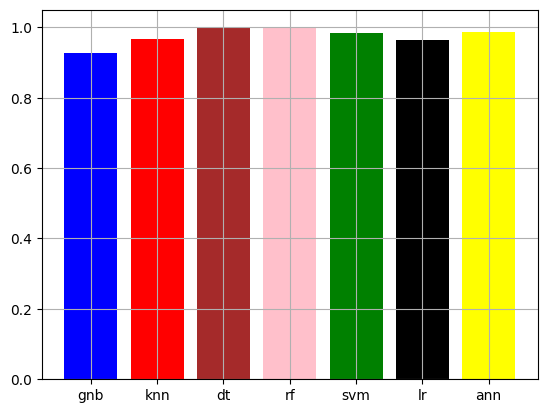

In [26]:
import matplotlib.pyplot as plt

acc_train=(acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann)
title=("gnb","knn","dt","rf","svm","lr","ann")
colors=("blue","red","brown","pink","green","black","yellow")

plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

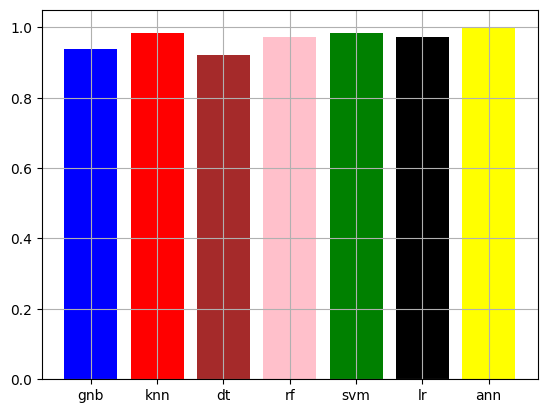

In [27]:
import matplotlib.pyplot as plt

acc_test=(acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann)
title=("gnb","knn","dt","rf","svm","lr","ann")
colors=("blue","red","brown","pink","green","black","yellow")

plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

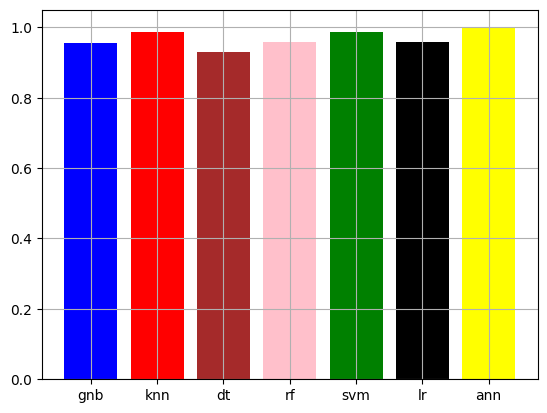

In [28]:
import matplotlib.pyplot as plt

p=(p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann)
title=("gnb","knn","dt","rf","svm","lr","ann")
colors=("blue","red","brown","pink","green","black","yellow")

plt.bar(title,p,color=colors)
plt.grid()
plt.show()

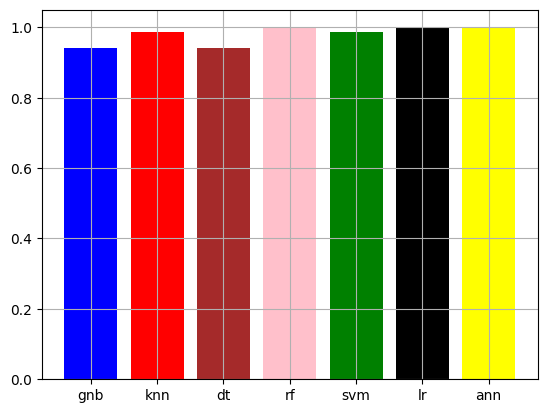

In [29]:
import matplotlib.pyplot as plt

r=(r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann)
title=("gnb","knn","dt","rf","svm","lr","ann")
colors=("blue","red","brown","pink","green","black","yellow")

plt.bar(title,r,color=colors)
plt.grid()
plt.show()